In [153]:
import ee
import geemap
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import time
import numpy as np
from collections import defaultdict
from sklearn.cluster import KMeans

In [5]:
df2019_1500 = pd.read_csv('assets/df2019_summary_1500.csv')
df2019_1000 = pd.read_csv('assets/df2019_summary_1000.csv')
df2021_1500 = pd.read_csv('assets/df2021_summary_1500.csv')
df2021_1000 = pd.read_csv('assets/df2021_summary_1000.csv')

In [47]:
ovw = [df2019_1500,df2019_1000,df2021_1500,df2021_1000]
for x in range(len(ovw)):
    df = ovw[x]
    col = []
    for i in range(df.shape[0]):
        time.sleep(0.5)
        lat = df.iloc[i]['Latitude']
        lon = df.iloc[i]['Longitude']
        call = requests.get('https://api.open-elevation.com/api/v1/lookup?locations=%s,%s'%(lat,lon), headers = {'User-agent': 'YEET'})
        if call.status_code == 429:
            raise Exception('Too many requests')
        elevation = call.json()['results'][0]['elevation']
        print('elevation of %sm at lon=%s,lat=%s'%(elevation,lon,lat))
        col.append(elevation)
    col = pd.DataFrame(col,columns =['Elevation'])
    
    ovw[x] = pd.concat([df,col], axis=1)
    print(ovw[x].head(1))

elevation of 917m at lon=84.40085914,lat=28.31540133
elevation of 794m at lon=84.35741563,lat=28.28039955
elevation of 817m at lon=87.31359065,lat=27.55922665
elevation of 636m at lon=87.23096788,lat=27.53959085
elevation of 1288m at lon=82.67108729,lat=28.67376979
elevation of 1800m at lon=82.86400974,lat=28.38531481
elevation of 1259m at lon=83.18013489,lat=28.23473065
elevation of 982m at lon=83.17929804,lat=28.27617323
elevation of 2057m at lon=85.53968705,lat=28.00401185
elevation of 1084m at lon=81.01938583,lat=29.25727569
elevation of 1799m at lon=81.43843428,lat=29.22543596
elevation of 1666m at lon=81.34567442,lat=28.96458838
elevation of 516m at lon=80.94853643,lat=29.24938288
elevation of 2192m at lon=82.01811903,lat=29.22858446
elevation of 1036m at lon=81.37741998,lat=29.08804576
elevation of 1540m at lon=80.80474132,lat=29.59467957
elevation of 1514m at lon=81.69970947,lat=29.36085232
elevation of 828m at lon=84.75281726,lat=28.07582526
elevation of 902m at lon=87.3569766

In [139]:
df19_15 = ovw[0]
df19_10 = ovw[1]
df21_15 = ovw[2]
df21_10 = ovw[3]
df21_15.head(9)

,Unnamed: 0,S.No,Latitude,Longitude,totalPixels,start_year,end_year,built_2015,water_2015,tree_2015,...,grass_2021,flooded_veg_2021,crop_2021,shrub_2021,bare_2021,slope_before,slope_after,slope_ratio,slope_good,Elevation
0,0,3041.0,28.267447,82.780081,79474.0,2021.0,2022.0,2893.0,45.0,58331.0,...,4.0,0.0,2817.0,21747.0,93.0,101.869291,58.241896,0.571732,0,941
1,1,6138.0,28.297827,83.404266,79504.0,2021.0,2022.0,876.0,84.0,68519.0,...,132.0,0.0,285.0,6868.0,7.0,44.727989,827.327252,18.496858,1,1721
2,2,7579.0,27.608497,84.081000,78979.0,2021.0,2022.0,8693.0,31.0,36097.0,...,0.0,0.0,36096.0,46.0,265.0,63.968340,75.256012,1.176457,1,172
3,3,8166.0,29.113846,81.661377,76019.0,2021.0,2022.0,2771.0,1840.0,28805.0,...,3883.0,0.0,2884.0,33635.0,141.0,-108.424561,247.416655,-2.281924,1,1044
4,4,8312.0,27.561421,83.911259,78959.0,2021.0,2022.0,3243.0,3320.0,47399.0,...,61.0,0.0,12267.0,2516.0,10545.0,28.623053,358.803565,12.535475,1,131
5,5,8389.0,28.820485,81.790846,60268.0,2021.0,2022.0,30.0,0.0,45978.0,...,71.0,0.0,1170.0,19785.0,0.0,-3614.890583,1475.478499,-0.408167,1,1255
6,6,8390.0,29.300982,81.633295,80270.0,2021.0,2022.0,142.0,0.0,77324.0,...,194.0,0.0,1518.0,1387.0,0.0,-1130.563380,0.000000,-0.000000,-1,2877
7,7,8391.0,28.706862,82.207359,79815.0,2021.0,2022.0,3958.0,36.0,69671.0,...,5.0,0.0,5103.0,4581.0,0.0,146.698157,-198.506649,-1.353164,0,813
8,8,8392.0,28.882792,82.289245,75219.0,2021.0,2022.0,1.0,2548.0,54626.0,...,877.0,0.0,2710.0,25314.0,2253.0,192.114918,63.718918,0.331671,0,1418


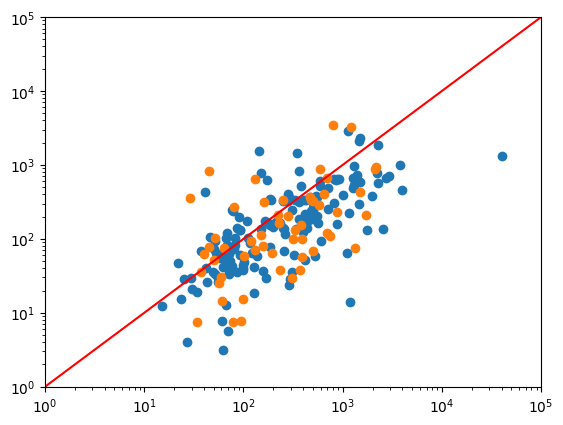

In [130]:
plt.scatter(df19_15['slope_before'],df19_15['slope_after'])
plt.scatter(df21_15['slope_before'],df21_15['slope_after'])
#plt.yscale('log')
#plt.xscale('log')
plt.plot(np.linspace(0.0, 1e5),np.linspace(0.0, 1e5),color='red')
plt.ylim(1,1e5)
plt.xlim(1,1e5)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [138]:
for x in ovw:
    print(f'Correlation coeff = %s'%(np.corrcoef(x['slope_good'],x['Elevation'])[0,1]))

Correlation coeff = 0.034679892621895
Correlation coeff = 0.031077927241117576
Correlation coeff = -0.00294731261970606
Correlation coeff = -0.05456662104741489


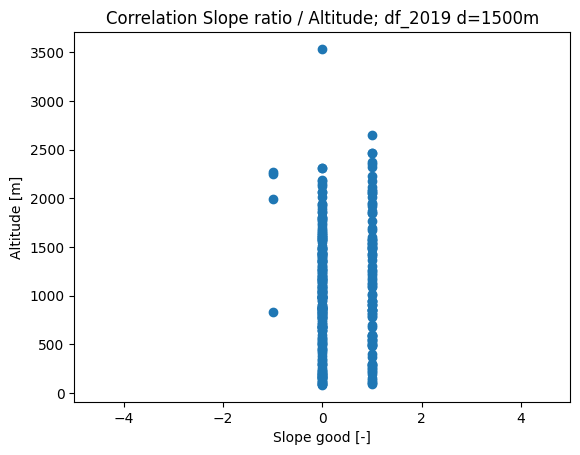

In [145]:
plt.scatter(df19_15['slope_good'],df19_15['Elevation'])
#plt.scatter(df21_15['slope_ratio'],df21_15['Elevation'])
#plt.yscale('log')
#plt.xscale('log')
plt.xlim(-5,5)
plt.ylabel('Altitude [m]')
plt.xlabel('Slope good [-]')
plt.title('Correlation Slope ratio / Altitude; df_2019 d=1500m')
plt.show()

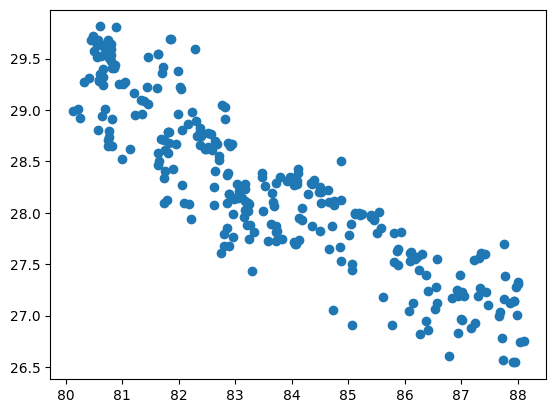

In [148]:
plt.scatter(df19_15['Longitude'],df19_15['Latitude'])
plt.show()

In [287]:
min_lon = min(df19_15['Longitude'])
max_lon = max(df19_15['Longitude'])
min_lat = min(df19_15['Latitude'])
max_lat = max(df19_15['Latitude'])
test_df19 = df19_15.loc[:, df.columns.intersection(['Latitude','Longitude'])]
test_df19

,Latitude,Longitude
0,28.315401,84.400859
1,28.280400,84.357416
2,27.559227,87.313591
3,27.539591,87.230968
4,28.673770,82.671087
...,...,...
280,27.306247,87.997567
281,26.749075,88.110760
282,28.554330,82.713399
283,28.199532,84.482626


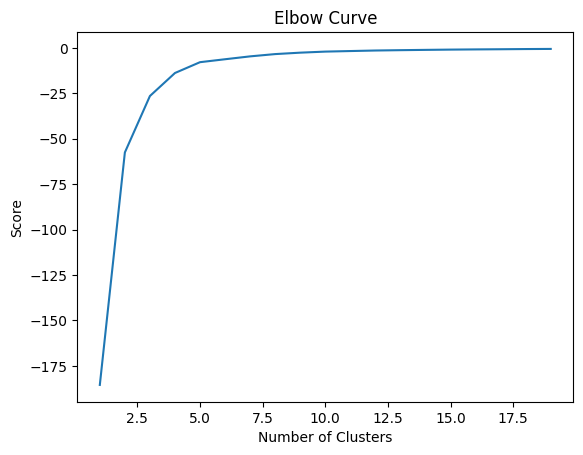

In [288]:
K_clusters = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = test_df19[['Latitude']]
X_axis = test_df19[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [289]:
N_clusters = 8
kmeans = KMeans(N_clusters)
kmeans.fit(test_df19)
clusters = kmeans.fit_predict(test_df19)
test_df19['Cluster'] = clusters
test_df19['Elevation'] = df19_15['Elevation']
test_df19['slope_good'] = df19_15['slope_good']

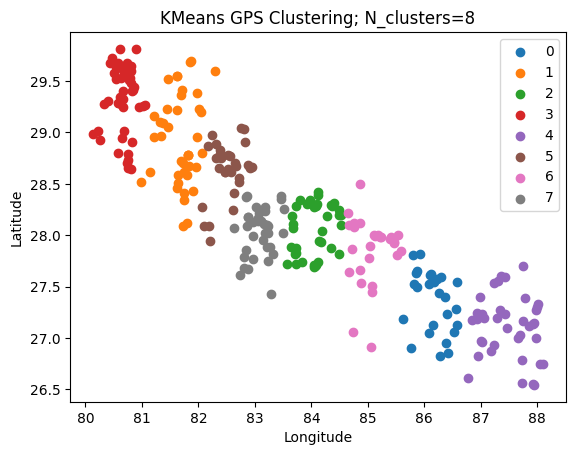

In [290]:
for i in sorted(list(test_df19['Cluster'].unique())):
    sub = test_df19[test_df19.Cluster == i]
    plt.scatter(sub['Longitude'],sub['Latitude'],label=i)

#plt.scatter(test_df19['Longitude'], test_df19['Latitude'], c=color_arr) #, cmap = 'rainbow'
plt.legend()
plt.title('KMeans GPS Clustering; N_clusters=%s'%(N_clusters))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

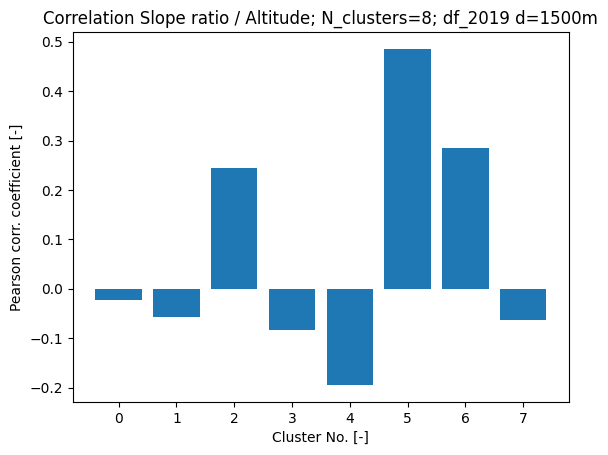

In [273]:
corr_arr = []
for i in range(N_clusters):
    sub = test_df19[test_df19.Cluster == i]
    #print(sub.shape)
    corr_arr.append(np.corrcoef(sub['slope_good'],sub['Elevation'])[0,1])

plt.bar(range(N_clusters),corr_arr)
plt.title('Correlation Slope good / Altitude; N_clusters=%s; df_2019 d=1500m'%(N_clusters))
plt.xlabel('Cluster No. [-]')
plt.ylabel('Pearson corr. coefficient [-]')
plt.show()
    